In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    confusion_matrix,
    RocCurveDisplay,
)

In [ ]:
DATA_PATH = "Network Intrusion(in).csv"
df = pd.read_csv(DATA_PATH)

In [3]:
df = df.dropna().reset_index(drop=True)

In [4]:
cat_cols = ["protocol_type", "service", "flag"]
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [6]:
X = df.drop(columns=["class"])
y = df["class"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)


In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [9]:
param_grid = {
    "penalty": ["l2", "none"],
    "C": [0.01, 0.1, 1, 10],
    "solver": ["lbfgs", "newton-cg", "saga"],
    "max_iter": [1000],
}

base_logreg = LogisticRegression(class_weight="balanced", n_jobs=-1)
grid = GridSearchCV(
    estimator=base_logreg,
    param_grid=param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=1,
)

grid.fit(X_train, y_train)
best_logreg = grid.best_estimator_
print("Best hyper‑parameters:", grid.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best hyper‑parameters: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}



Classification Report:
               precision    recall  f1-score   support

     anomaly     0.9727    0.9698    0.9712      2349
      normal     0.9737    0.9762    0.9749      2690

    accuracy                         0.9732      5039
   macro avg     0.9732    0.9730    0.9731      5039
weighted avg     0.9732    0.9732    0.9732      5039

ROC‑AUC: 0.9957


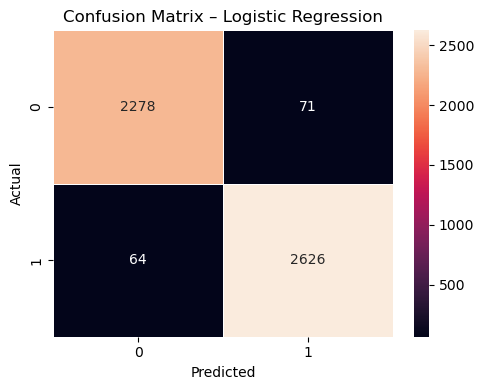

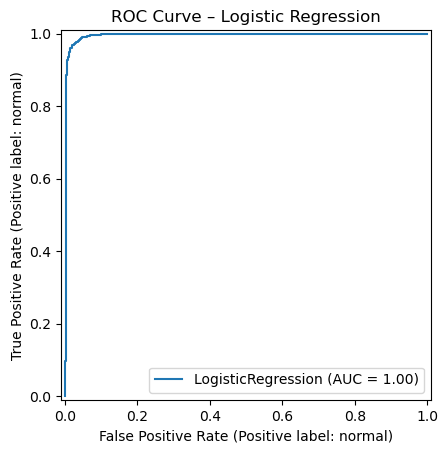

In [10]:
y_pred  = best_logreg.predict(X_test)
y_proba = best_logreg.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
print("ROC‑AUC:", round(roc_auc_score(y_test, y_proba), 4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Logistic Regression")
plt.tight_layout()
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(best_logreg, X_test, y_test)
plt.title("ROC Curve – Logistic Regression")
plt.show()
